# Shreya Jagani - Data Science intern at LetsGrowMore Virtual Internship Program (October - 2022)

# Beginner level Task 2 : Stock Market Prediction and Forecasting Using Stacked LSTM

# Algorithm Used : Long Short Term Memory

**Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load Dataset**

In [10]:
df= pd.read_csv("stock.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [11]:
print(df.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [12]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [13]:
stock_data=df.reset_index()['Close']

In [14]:
stock_data.shape

(2035,)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


**Plot the Dataframe**

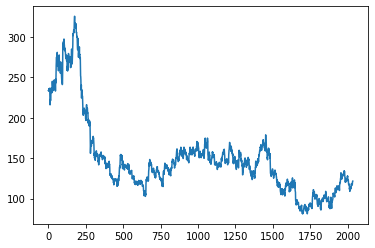

In [17]:
plt.plot(stock_data)

**Apply minmax scalar because LSTM are sesitive to the scale of data**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
stock_data = scaler.fit_transform(np.array(stock_data).reshape(-1,1))

In [25]:
stock_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

 **Splitting dataset into training and testing**

In [26]:
training_size=int(len(stock_data)*0.65)
test_size=len(stock_data)-training_size


In [27]:
training_size,test_size

(1322, 713)

In [28]:
train_data,test_data=stock_data[0:training_size],stock_data[training_size:len(stock_data),:1]

In [29]:
#Convert an array of values unto dataset matrix

def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[] 
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [30]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [31]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [33]:
print(X_train.shape),print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [34]:
print(X_test.shape),print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [35]:
#reshape input
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

**Creating LSTM Model**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
from pickletools import optimize


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tabnanny import verbose


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 8s 414ms/step - loss: 2.3554e-04 - val_loss: 2.7590e-04
Epoch 2/100
20/20 [==============================] - 11s 532ms/step - loss: 2.5134e-04 - val_loss: 3.1231e-04
Epoch 3/100
20/20 [==============================] - 8s 415ms/step - loss: 2.8825e-04 - val_loss: 3.2767e-04
Epoch 4/100
20/20 [==============================] - 9s 431ms/step - loss: 2.9341e-04 - val_loss: 1.8618e-04
Epoch 5/100
20/20 [==============================] - 8s 407ms/step - loss: 3.1098e-04 - val_loss: 2.0467e-04
Epoch 6/100
20/20 [==============================] - 8s 420ms/step - loss: 2.2347e-04 - val_loss: 1.8147e-04
Epoch 7/100
20/20 [==============================] - 8s 413ms/step - loss: 2.2601e-04 - val_loss: 3.2266e-04
Epoch 8/100
20/20 [==============================] - 8s 407ms/step - loss: 3.3013e-04 - val_loss: 1.9508e-04
Epoch 9/100
20/20 [==============================] - 8s 416ms/step - loss: 2.1133e-04 - val_loss: 2.4033e-04
Epoch 10/100
20/20

**Generate Prediction**

In [43]:
import tensorflow as tf

In [45]:
tf.__version__

'2.10.0'

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 67ms/step


In [53]:
#Transformback to original reverse scaling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**Calculate RMSE (Root mean square error)**

In [54]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

167.12338727909918

In [55]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

115.68532432127165

**Shift train prediction for plotting**

In [56]:
look_back=100
train_predict_plot=np.empty_like(stock_data)
train_predict_plot[:, :]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [64]:
test_Predict_Plot = np.empty_like(stock_data)
test_Predict_Plot[:, :] = np.nan
test_Predict_Plot[len(train_predict)+(look_back*2)+1:len(stock_data)-1, :] = test_predict

**Plot baseline and prediction**

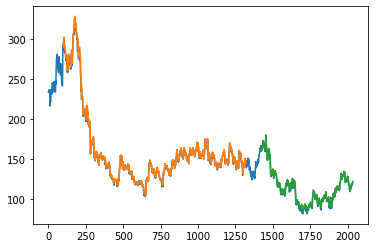

In [65]:
plt.plot(scaler.inverse_transform(stock_data))
plt.plot(train_predict_plot)
plt.plot(test_Predict_Plot)
plt.show()


In [67]:
len(test_data),X_test.shape

(713, (612, 100, 1))

In [68]:
X_input=test_data[613:].reshape(1,-1)
X_input.shape

(1, 100)

In [71]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

**Prediction for next 30 days**

In [76]:
from numpy import array

lst_output=[]
n_steps=100
i=1
while(i<30):
    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape(1,n_steps,1)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

1 day input [0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.16683395 0.16800332
 0.16876675 0.16939808 0.16997929 0.17055264 0.17113079 0.17170767
 0.17227043 0.17280738 0.17331207 0.17378429 0.17422909 0.17465477
 0.17507087 0.17548651 0.17590912 0.17634399 0.17679423 0.17726135
 0.17774539 0.17824543 0.17876017 0.1792879  0.17982705 0.18037607
 0.18093342 0.18149768 0.18206754 0.18264171 0.183219   0.18379818
 0.18437816 0.18495807 0.18553695 0.18611407 0.18668874 0.18726052
 0.18782893 0.18839368 0.1889545  0.18951134 0.190064   0.19061264
 0.1911571  0.19169766 0.19223425 0.19276716 0.19329639 0.19382213
 0.19434468 0.19486409 0.19538049 0.19589417 0.19640532 0.1969139
 0.19742009 0.19792421 0.19842617 0.1989262  0.19942436 0.19992068
 0.20041539 0.20090844 0.20140001 0.20188999 0.20237859 0.20286585
 0.20335174 0.20383626 0.20431952 0.2048015  0.20528232 0.20576197
 0.2062405  0.20671789 0.20719421 0.20766954 0.2081

In [92]:
day_new=np.arange(1,101)
day_predict=np.arange(101,130)

In [81]:
len(stock_data)

2035

In [82]:
stock_data1=stock_data.tolist()
stock_data1.extend(lst_output)


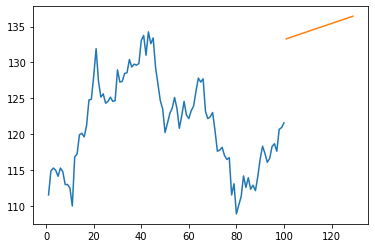

In [91]:
plt.plot(day_new,scaler.inverse_transform(stock_data[1935:]))
plt.plot(day_predict,scaler.inverse_transform(lst_output))